<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear II</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso *dataset* é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia (km) (em linha reta)</li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima (km) (em linha reta)</li>
</ul>

## Leitura dos dados

In [2]:
dados = pd.read_csv('../Dados/dataset.csv', sep=';')

## Visualizar os dados

In [3]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


## Verificando o tamanho do dataset

In [4]:
dados.shape

(5000, 4)

# <font color='red' style='font-size: 30px;'>1.3 Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [5]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [6]:
dados.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


A função corr cria a correlação de uma variável com a outra (coeficiente angular). 

Exemplo: Valor e Área (1,2) = 0.7110. Ou seja esse é o coeficiente angular relacionando as 2 variáveis

# <font color='red' style='font-size: 30px;'>2.1 Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [7]:
import seaborn as sns

A variável dependente (y) é o VALOR, ou seja o preço, uma vez que queremos entender QUAIS variáveis independentes (X) afetam o valor (Y) do imóvel.

## Configurações de formatação dos gráficos

In [9]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

# style -> white, dark, whitegrid, darkgrid, ticks

sns.set_palette("Accent")
sns.set_style("darkgrid")


## Box plot da variável *dependente* (y)

<img width='700px' src='../Dados/img/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Preço dos Imóveis'}, xlabel='Reais'>

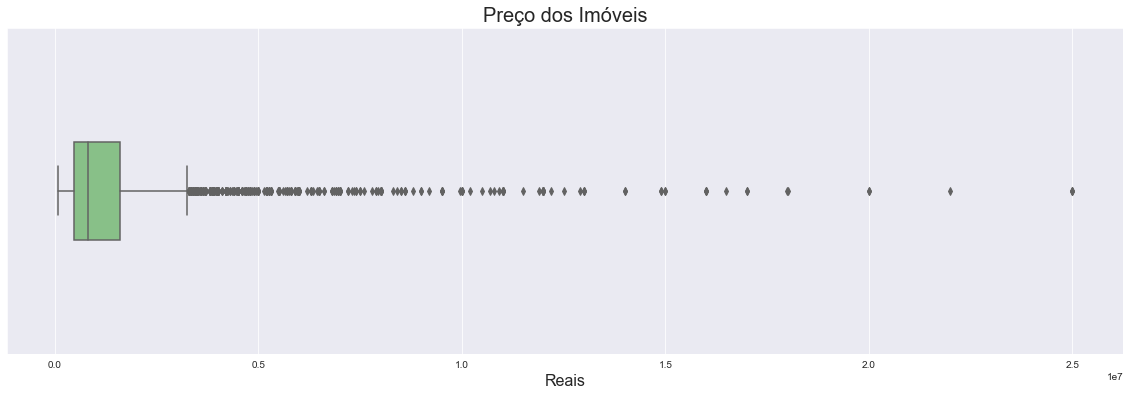

In [10]:
ax = sns.boxplot (dados['Valor'], orient = 'h', width =0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

Na distribuição que obtivemos nesse gráfico, talvez os pontos próximos a 2.5 sejam realmente outliers. Talvez tenhamos que utilizar outra técnica e separar essa amostra por faixas de preço de imóveis para estimar regressões diferentes. 

Enfim, muito cuidado com outliers, evite dispensar dados, pois você pode acabar eliminando informações importantes do Dataset.

# <font color='red' style='font-size: 30px;'>2.2 Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='Preço dos Imóveis (R$)', ylabel='Density'>

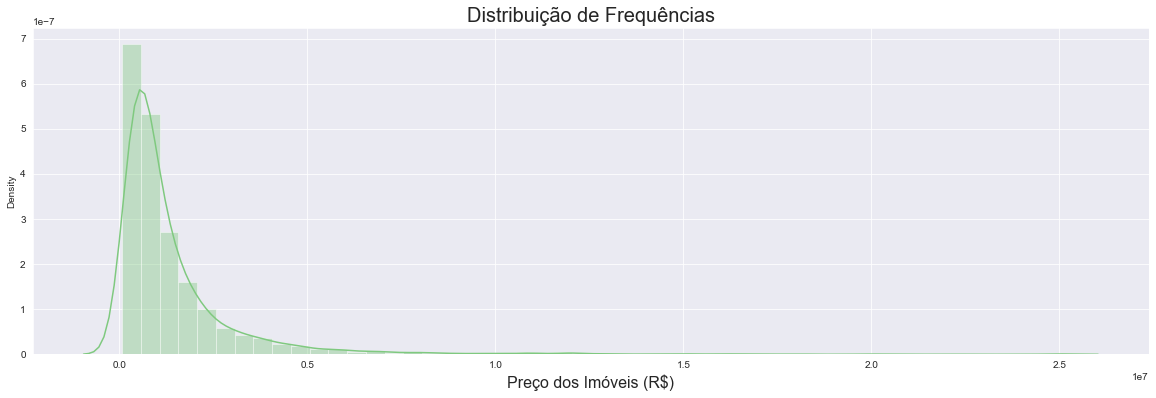

In [11]:
ax = sns.distplot (dados['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

<img width='800px' src='../Dados/img/Box-Plot II.png'>

Esse comportamento é muito comum para esse tipo de informação. Há mais imóveis com valores mais baixos — aproximadamente com o mesmo valor, seguindo um mesmo padrão — do que imóveis de luxo, que compõem a minoria e custam muito mais caro. E é basicamente isso que o gráfico de distribuição de frequências nos mostra.

Logicamente, a perfeição é quase que impossível de se alcançar nesses gráficos, mas a ideia é nos aproximarmos ao máximo do padrão simétrico, para obtermos estimativas — estatísticas — mais confiáveis para utilizar no futuro. Caso contrário, teremos que partir para análise de outros tipos de estatísticas, diferentes das que são baseadas na distribuição simétrica. Adiante discutiremos mais a respeito.



# <font color='red' style='font-size: 30px;'>2.3 Dispersão Entre as Variáveis</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

Agora, tentaremos identificar se a variável dependente e as variáveis explicativas possuem alguma relação linear.

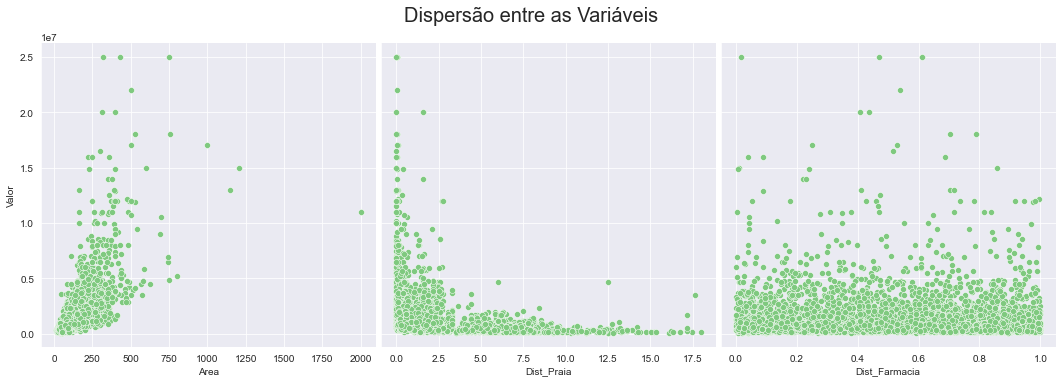

In [13]:
ax = sns.pairplot (dados, y_vars = 'Valor', x_vars = ['Area','Dist_Praia','Dist_Farmacia'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

Não ficou muito claro qual a relação linear das variáveis independentes em relação à dependente. 

Usa-se o argumento kind='reg' para entender a reta

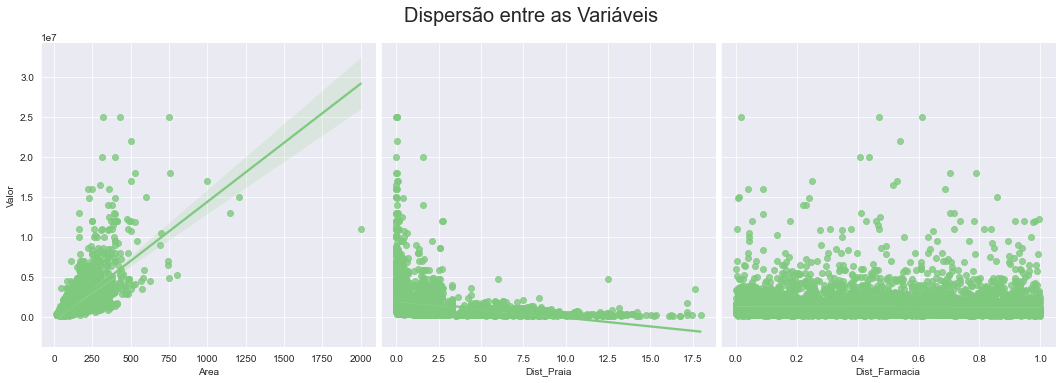

In [14]:
ax = sns.pairplot (dados, y_vars = 'Valor', x_vars = ['Area','Dist_Praia','Dist_Farmacia'],kind='reg' ,height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

O primeiro gráfico, de Area, traz uma reta com um intervalo muito escancarado, mostrando que há uma "explosão".

No segundo gráfico, de Dist_Praia, a reta apresenta uma tendência para baixo, mesmo com uma quantidade considerável de dados fora da reta. Visualmente, nota-se que não é uma boa representação. 

No terceiro gráfico, de Dist_Farmacia, encontramos uma reta na base, onde está a concentração de dados, mas também está um pouco estranho pois não há variação, nem direção, portanto está reto. Então, considerando a correlação anterior também, parece que essas distribuições não explicarão muito bem a variação da variável Valor. 

Sendo assim, identificaremos isso no modelo de regressão, sem o menor problema.

Sabendo que os gráficos estão uma bagunça e que as relações lineares praticamente não existem em algumas variáveis, adiante, utilizaremos uma técnica de transformação de dados, que consiste em passar o logaritmo deles.

Com a transformação logarítmica e repetindo todas essas análises gráficas, conferiremos o que acontece com os dados transformados e se eles já indicam uma relação linear, de forma que possamos estimar um número de regressão a partir deles.

# <font color='red' style='font-size: 30px;'>3.1 Transformando os Dados</font>
<hr style='border: 2px solid red;'>

## Distribuição Normal
<hr>

### Por quê? 
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.).</p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

No caso, os testes paramétricos assumem que a amostra é retirada de uma população com distribuição de probabilidade conhecida. A maioria dos testes estatísticos assumem que essa distribuição de probabilidade conhecida é a distribuição normal e, por isso, queremos que os dados tenham uma distribuição de frequência semelhante a de um sino, como demonstrado no gráfico simétrico. Então, tentaremos alcançar essa simetria, utilizando a transformação dos dados, que estudaremos a seguir.

## Importando biblioteca numpy

In [15]:
import numpy as np

## Aplicando a transformação logarítmica aos dados do *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [17]:
np.log(0)

C:\Users\lucas\AppData\Local\Temp/ipykernel_10360/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

sabemos que log de zero naõ existe, então temos que tomar cuidado ao transformar todos os dados em log, pois alguns estão com o valor zero e não podem ser excluidos do df. Exemplo: Distância do ap até a praia: 0m

Um macete é acrescentar o valor +1, pois o log de 1 é zero

In [18]:
dados['log_Valor'] = np.log(dados['Valor'])
dados['log_Area'] = np.log(dados['Area'])
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1) 
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia']+1)

In [19]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


## Distribuição de frequências da variável *dependente transformada* (y)

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='log do Preço dos Imóveis', ylabel='Density'>

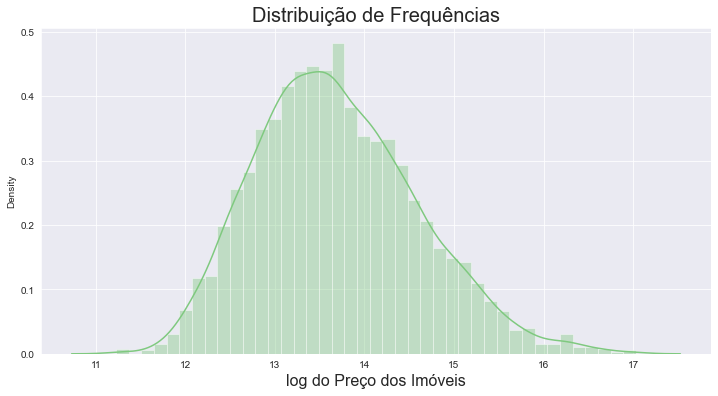

In [21]:
ax = sns.distplot (dados ['log_Valor'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

Isso mostra que deixando os valores em log, a curva de distribuiçaõ se aproxima de uma distribuição normal, possuindo uma relação mais linear.

# <font color='red' style='font-size: 30px;'>3.2 Verificando Relação Linear</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis transformadas do dataset

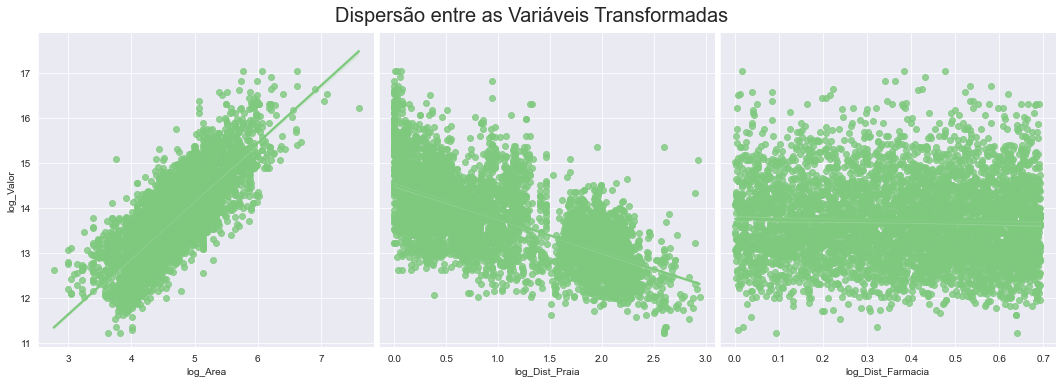

In [22]:
ax = sns.pairplot (dados, y_vars = 'log_Valor', x_vars = ['log_Area','log_Dist_Praia','log_Dist_Farmacia'],kind='reg' ,height=5)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

Podemos observar que o valor em relação a Área apresenta uma relação linear de crescimento, e em relação à distância da praia é de decaimento.

Para a distância da farmácia, não há conclusões exatas observando o gráfico

# <font color='red' style='font-size: 30px;'>4.1 Criando os *Datasets* de Treino e Teste</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Trabalharemos com uma técnica conhecida em Data Science, que consiste em pegar o Dataset e dividi-lo aleatoriamente em duas partes: uma para treino — utilizada para estimar o modelo — e outra para teste, justamente para testar o modelo estimado.

Continuando, faremos a importação de uma ferramenta do scikit-learn, que nos ajudará a separar o arquivo em treino e teste, preenchendo a célula da seguinte forma:

In [23]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Preço dos Imóveis (y)

Feita a importação, seguiremos para a criação de uma Series e de um DataFrame, que serão alimentadas por uma função. Primeiro preencheremos a célula com:

In [24]:
y = dados['log_Valor']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [25]:
X = dados[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

## Criando os datasets de treino e de teste

Na próxima célula, "Criando os datasets de treino e de teste" vamos retomar o desempacotamento de tuplas. Trata-se do retorno que obteremos da função inserida nessa célula. No caso, a função será composta por:



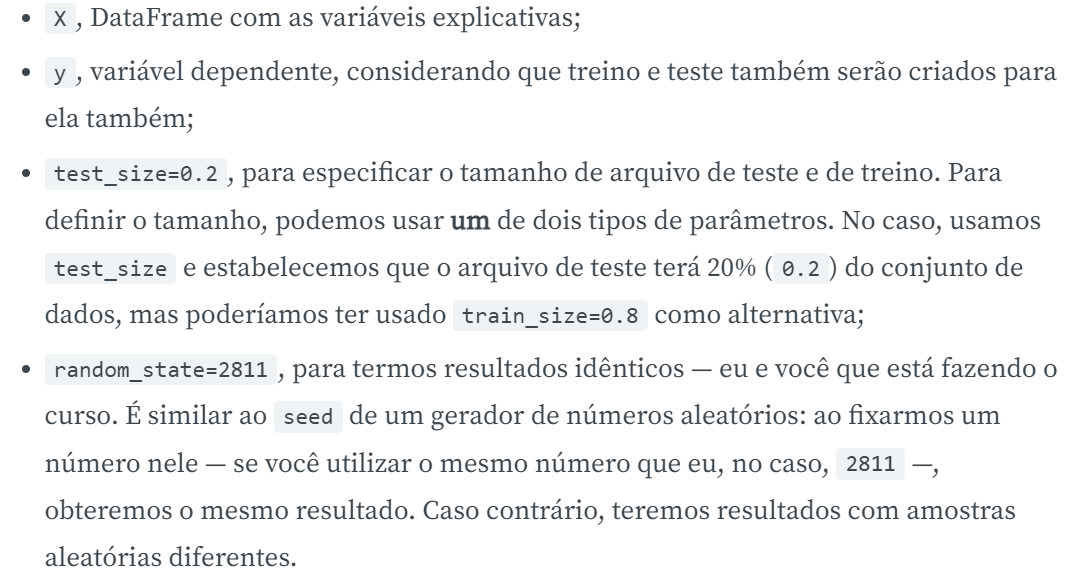

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



Utilizaremos essa ferramenta para fazer a primeira estimativa, analisando algumas estatísticas mais formais do modelo para tentar estimar um modelo melhor e, depois, realizar os testes a partir dele. Posteriormente, voltamos a utilizar o scikit-learn.



<img width='800px' src='../Dados/img/Log-linear.png'>

Agora conheceremos uma nova ferramenta, que é a biblioteca statsmodel, a qual faz estimações e gera testes de hipótese, tendo uma característica mais estatística, o que é bem parecido com a linguagem R.



## Importando a biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [28]:
import statsmodels.api as sm

Estimamos modelos com contantes como já vimos no curso anterior, e agora queremos estimar um modelo com a constante intercepto. Nesta biblioteca, precisamos colocá-la dentro do dataframe que iremos utilizar com variáveis explicativas para gerar as estimativas.

## Estimando o modelo com statsmodels

In [32]:
X_train_com_constante = sm.add_constant(X_train)

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [33]:
X_train

,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,5.945421,0.000000,0.382273
912,3.135494,0.972865,0.605015
3042,4.317488,1.794961,0.486594
141,3.401197,0.310455,0.599609
3854,5.676754,0.032193,0.101903
...,...,...,...
3657,5.075174,2.023480,0.333605
979,4.174387,2.296141,0.156465
2389,4.394449,1.367741,0.409727
447,3.951244,2.166841,0.217381


In [34]:
X_train_com_constante

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


Com isso, já teremos uma variável const que é uma constante com o valor 1.0. Se já tivermos estudado Estatística, já teremos visto a álgebra matricial por trás da estimação de modelos de regressão lineares utilizando o método OLS(), que significa os mínimos quadrados ordinários.



Veremos que isso é a forma como estima as matrizes e calcula o intercepto, criando uma coluna com 1.0, e é isso que o statsmodels precisa que forneçamos.

Fornecido isso, teremos um novo dataframe que é o que utilizaremos para fazer as estimativas e analisar as estatísticas. Portanto, daremos um nome modelo_statsmodels em seguida, e só o utilizaremos na análise dos testes.

Chamaremos sm com .OLS() passando o y_train que criamos anteriormente, seguido do X_train_com_constate, pois do contrário não teríamos um modelo com constante e não irá adicioná-la.

Isso já nos gera um objeto modelo_statsmodels que analisaremos mais adiante em detalhes. Numa nova célula seguinte, veremos que este já possui um sumário com as estatísticas escrevendo modelo_statsmodels.summary(), mas também analisaremos isso futuramente.

In [35]:
modelo_statsmodel = sm.OLS(y_train, X_train_com_constante, hascont = True).fit()

In [37]:
print(modelo_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:52:03   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

# <font color='red' style='font-size: 30px;'>4.2 Avaliando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Avaliando as estatísticas de teste do modelo

In [38]:
print(modelo_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:53:27   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

Aqui, conseguimos ver também o R-squared que é o R2 em que alcançamos 80% o R2 (Adj. R-squared) ajustado também é uma estatística interessante que é basicamente o que considera os graus de liberdade, ou seja, se colocarmos muitas variáveis ele vai diminuindo seu grau de liberdade.

O teste F (F-statistic) é um teste de importante - todos estes são testes de hipótese - que testa a significância de todos os parâmetros do modelo em conjunto. O teste que ele faz é se você aceita a hipótese ou não desses itens conjuntamente serem iguais a zero, ou seja, regressão de sentido. Como verificar isso de forma simples?

Tínhamos a estatística de Teste (F-statistic) 5495 e a Aceitação (Prob (F-statisc)) de 0.00. Valores acima de 0.05, rejeitamos o modelo, ou seja, ele não é estatisticamente significativo, segundo essa estatística eles são praticamente zero, a regressão não é boa. Ao nível de 95% em Prob F Statistic você teria que ter uma estatística menor ou igual a0.05, maior que isso nosso modelo precisaria ser revisto.

Também aqui temos o teste t com as estatísticas para cada variável. P>|t| é o equivalente ao Prob (F-statistic) então funciona da mesma maneira que ele. Identificamos que o parâmetro não é estatisticamente significativo, ou seja, ele tá dizendo que esse parâmetro. Nota-se, portanto, que o parâmetro log_Dist_Farmacia não passa no testes, que testa se "esse cara é igual a zero ou não".

O teste T testa a significância individual dos parâmetros e o teste F a significância conjunta dos parâmetros, ou seja, T se ele é zero ou não e se todos são zero ou não conjuntamente.

Agora entendemos os testes mais importantes e no próximo videos vamos reestimar o modelo eliminando' log_Dist_Farme vendo o que acontece com as estatísticas e também com os outros parâmetros/variáveis.

o log_dist_Farmacia mostrou que o teste t foir maior que 0.5 ou seja não foi viável a regressão

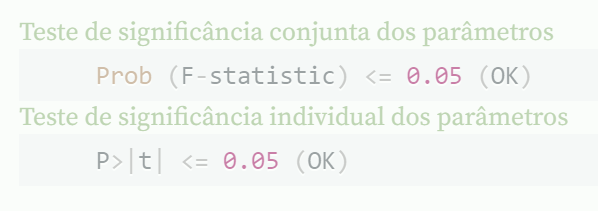

# <font color='red' style='font-size: 30px;'>4.3 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [39]:
X = dados[['log_Area', 'log_Dist_Praia']]

mantendo apenas os que passaram no teste

## Criando os datasets de treino e de teste

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

## Estimando o modelo com o statsmodels

In [41]:
X_train_com_constante = sm.add_constant(X_train)

modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


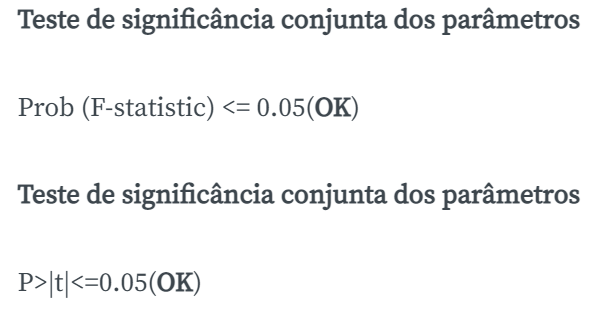

## Avaliando as estatísticas de teste do novo modelo

In [42]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:03:47   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

Reparem que nosso R2 (R-squared) ficou estacionado o que mostra que a variável log_Dist_Praia era bastante ruim porque como anteriormente dito, se é colocado informação e e ele está sempre aumenta o valor do R2 e nesse caso vemos que o R2 travou, logo, continua com R2 bom. 

Analisando nossa estatística de teste F, também passou - aqui os valores de F sendo menor ou igual a 0.05 foram deixados como cortesia

Podemos assumir que esse modelo está bem estimado.

# <font color='red' style='font-size: 30px;'>5.1 Estimando o Modelo com os Dados de Treino</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

## Instanciando a classe *LinearRegression()*

In [44]:
modelo =  LinearRegression() 

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [45]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [46]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.805


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [47]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [48]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² = 0.79


# <font color='red' style='font-size: 30px;'>5.2 Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [50]:
entrada = X_test[0:1]
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


## Gerando previsão pontual

In [51]:
modelo.predict(entrada)[0]

14.28482006184788

Teremos como saída uma previsão de 14.28. Não se trata de um valor de imóvel, afinal como realizamos uma transformação para a escala logarítmica, e precisamos inverter essa transformação para obter o valor em reais.



## Invertendo a transformação para obter a estimativa em R$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [52]:
np.exp(modelo.predict(entrada)[0]) 

1598889.784779439

Teremos uma saída de 1598889.784, agora sim temos o valor convertido para reais. Em seguida, geraremos um simulador simples em que podemos utilizar quaisquer valores que sejam do nosso interesse. Lembrando que os valores passados pelo usuário não estarão em log, então precisaremos realizar essa transformação posteriormente.



## Criando um simulador simples

In [53]:
Area = 250
Dist_Praia = 1
entrada = [[np.log(Area), np.log(Dist_Praia + 1)]]

print('R$ {0: 2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$  2777292.840312


Teremos como resultado o valor de 2777292.84, então essa é o valor estimado de um imóvel com essas características. Podemos alterar os valores para obter resultados diferentes.



# <font color='red' style='font-size: 30px;'>5.3 Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Preço do Imóveis) tendo todas as variáveis explicativas excluídas do modelo. No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em R$.</p>

In [54]:
modelo.intercept_

9.334916409800332

In [55]:
np.exp(modelo.intercept_)

11326.681428069882

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$ e $\beta_3$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares $\beta_2$ e $\beta_3$ medem as elasticidades de Y em relação a $X_2$ e $X_3$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$ e $X_3$.</p>

In [56]:
modelo.coef_

array([ 1.05807818, -0.49061226])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [57]:
X.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [58]:
index = ['Intercepto','log Área', 'log Distância até a Praia']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [59]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,9.334916
log Área,1.058078
log Distância até a Praia,-0.490612


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Preço dos Imóveis seria de <b>R$ 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Mantendo-se o valor de $X_3$ (Distância até a Praia) constante, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de <b>1.06%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distância até a Praia (km)</b> → Mantendo-se o valor de $X_2$ (Área) constante, um acréscimo de 1% na Distância de um imóvel até a praia gera, em média, um decréscimo de <b>0.49%</b> no Preço do Imóvel.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análises Gráficas dos Resultados do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [60]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='log do Preço - Previsão', ylabel='log do Preço - Real'>

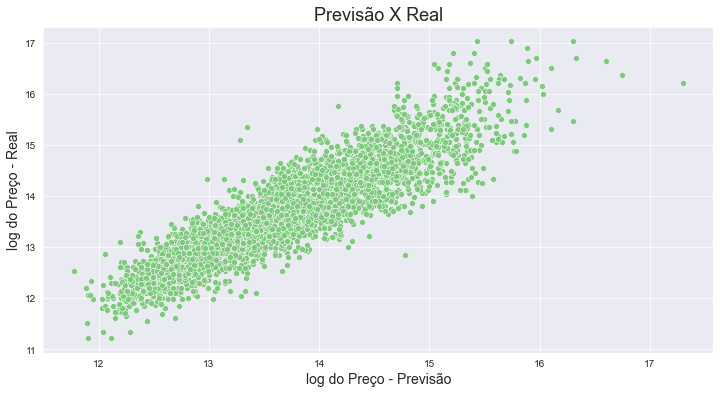

In [61]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

## Obtendo os resíduos

In [62]:
residuo = y_train - y_previsto_train

## Plotando a distribuição de frequências dos resíduos

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='log do preço', ylabel='Density'>

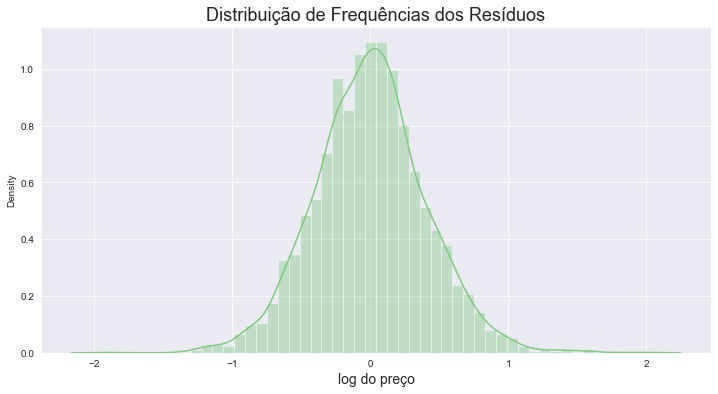

In [63]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do preço', fontsize=14)
ax

É importante frisar que este se trata de um estudo, e não de um modelo a ser usado comercialmente, que precisaria de mais variáveis e elementos para operar de maneira funcional. Contudo, conseguimos antever qual seria o comportamento adequado para que um modelo estimativo nos fornecesse informações seguras, e para este fim, nosso projeto cabe perfeitamente.

